<class 'pandas.core.frame.DataFrame'>
Index: 2161 entries, 1 to 2185
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Регион           2161 non-null   object 
 1   Год              2161 non-null   int64  
 2   ВРП_на_душу      2161 non-null   float64
 3   region_standard  2161 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 84.4+ KB
None

Пропуски по колонкам:
 Регион             0
Год                0
ВРП_на_душу        0
region_standard    0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 25

Статистика ВРП на душу населения:
 count    2.161000e+03
mean     2.583894e+05
std      5.331993e+05
min      0.000000e+00
25%      3.301230e+04
50%      1.318878e+05
75%      2.954355e+05
max      7.530485e+06
Name: ВРП_на_душу, dtype: float64


<Figure size 1600x600 with 0 Axes>

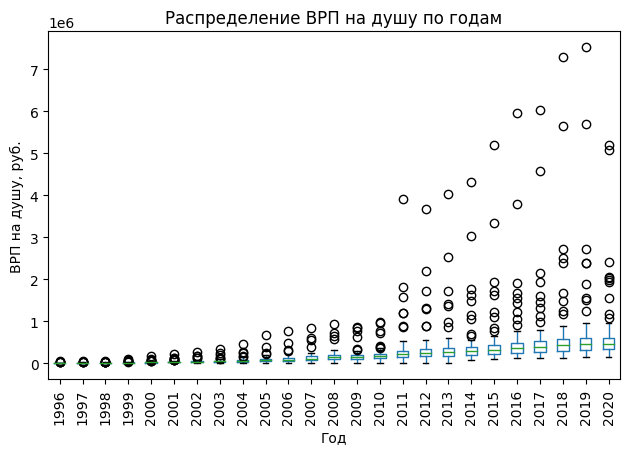

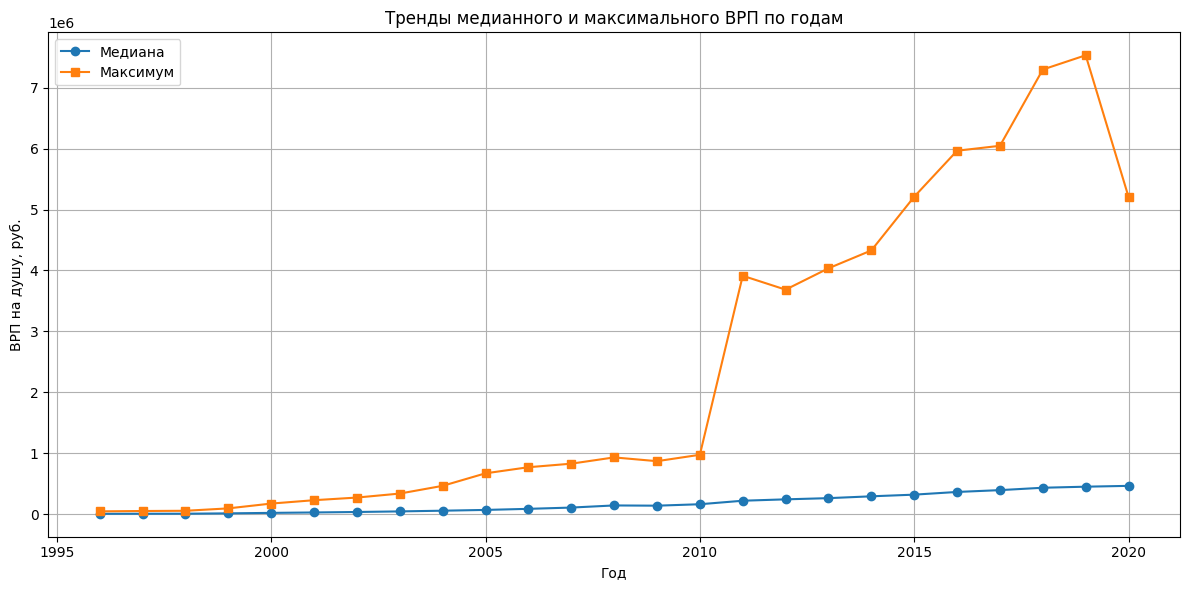


Топ-10 регионов по среднему ВРП:
 region_standard
Ненецкий автономный округ            2.313806e+06
Ямало-Ненецкий автономный округ      1.640577e+06
Ханты-Мансийский автономный округ    8.805455e+05
Сахалинская область                  8.607333e+05
Чукотский автономный округ           7.241227e+05
Москва                               6.667757e+05
Тюменская область                    6.427305e+05
Магаданская область                  4.885209e+05
Республика Саха (Якутия)             4.455480e+05
Санкт-Петербург                      3.554944e+05
Name: ВРП_на_душу, dtype: float64


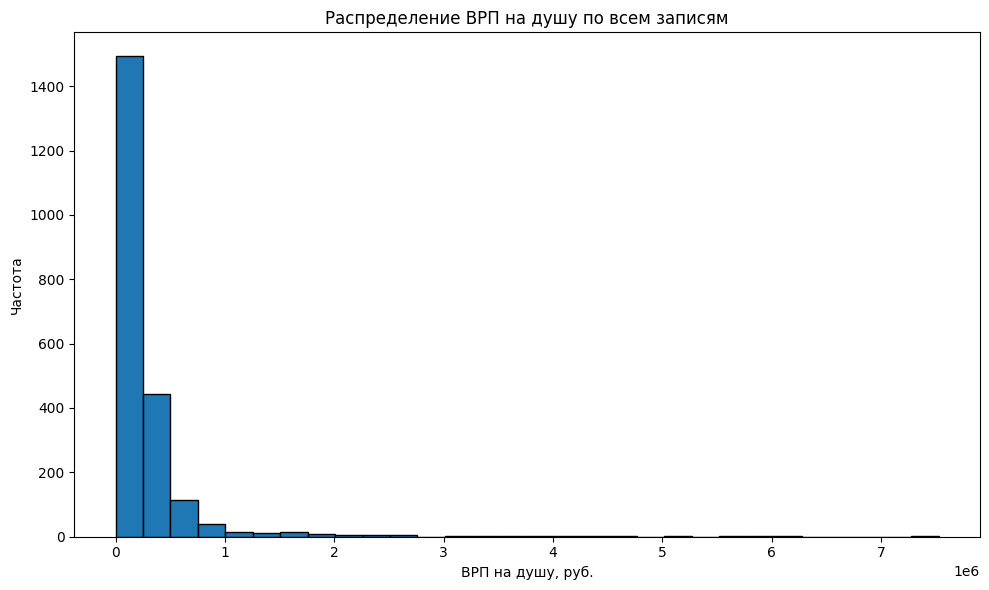

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/gross_standardized.csv"
df = pd.read_csv(file_path)

# 2. Фильтрация по region_standard
df = df[df["region_standard"].notna()]

# 3. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 4. Уникальные значения
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["Год"].nunique())

# 5. Статистика по ВРП
print("\nСтатистика ВРП на душу населения:\n", df["ВРП_на_душу"].describe())

# 6. Тренды медианы и максимума
median_vrp = df.groupby("Год")["ВРП_на_душу"].median()
max_vrp = df.groupby("Год")["ВРП_на_душу"].max()

# 7. Boxplot по годам
plt.figure(figsize=(16,6))
df.boxplot(column="ВРП_на_душу", by="Год", grid=False, rot=90)
plt.title("Распределение ВРП на душу по годам")
plt.suptitle("")
plt.ylabel("ВРП на душу, руб.")
plt.tight_layout()
plt.show()

# 8. Линии тренда
plt.figure(figsize=(12,6))
plt.plot(median_vrp.index, median_vrp.values, marker="o", label="Медиана")
plt.plot(max_vrp.index, max_vrp.values, marker="s", label="Максимум")
plt.title("Тренды медианного и максимального ВРП по годам")
plt.xlabel("Год")
plt.ylabel("ВРП на душу, руб.")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Топ-10 регионов по среднему ВРП
top10 = (
    df.groupby("region_standard")["ВРП_на_душу"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print("\nТоп-10 регионов по среднему ВРП:\n", top10)

# 10. Гистограмма распределения
plt.figure(figsize=(10,6))
plt.hist(df["ВРП_на_душу"], bins=30, edgecolor="black")
plt.title("Распределение ВРП на душу по всем записям")
plt.xlabel("ВРП на душу, руб.")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `gross_standardized.csv`

**Описание данных**
- 2,161 запись по 85 регионам.
- Период: 1996–2020 годы.
- Показатель: валовой региональный продукт (ВРП) на душу населения, руб.

---

**Типы данных**
- Все признаки корректны:
  - `Год` — int64
  - `ВРП_на_душу` — float64
  - `region_standard` — object

---

**Пропуски**
- Отсутствуют после фильтрации.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее значение: ~258,000 руб.
- Медиана: ~131,900 руб.
- Максимум: ~7,530,000 руб.
- 75% значений ниже ~295,400 руб.
- Минимум: 0 руб.

---

**Тренды медианы и максимума по годам**
- Медиана растёт стабильно.
- Максимум демонстрирует сильный рост в 2000-х и 2010-х за счёт северных регионов.
- Разрыв между медианой и максимумом увеличивается.

---

**Распределение по годам**
- Boxplot по годам показывает устойчивое смещение с длинным хвостом в высокие значения.
- Основная масса наблюдений сосредоточена до ~300 тыс. руб.

---

**Топ-10 регионов по среднему ВРП на душу**
(см. вывод в консоли)

---

**Визуализации**
- Boxplot по годам.
- Гистограмма распределения.
- Линии медианы и максимума по годам.

---

**Выбросы**
- Наличие высоких значений (свыше 1 млн руб.).
- Все выбросы относятся к добывающим регионам.
- Удалять не требуется, данные реалистичны.

---

**Вывод**
- Данные очищены и готовы для анализа и объединения с другими таблицами.
- Для моделирования рекомендуется использовать логарифмирование или робастные методы из-за выраженного скошенного распределения.


In [ ]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/gross_AfterEDA.csv", index=False)